# HDB Dataset no. 1: HDB Median Resale Price
Only numpy allowed, not allowed to use Pandas

Title: 'HDB Resale Price Index'

Description:
  - 'Tracks the overall price movement of the public residential market.'
  
  - 'The index is based on quarterly average resale price by date of registration.
    The index till 3Q2014 was computed using stratification method, while that from
    4Q2014 onwards is computed using the stratified hedonic regression method. 1Q2009
    is adopted as the new base period with index at 100. The index from 1Q1990 to
    3Q2014 are rebased to the new base period at 1Q2009. Indices from'
    
  - '1Q1990 to 3Q2014 are re-scaled using a factor of 100 (new index in 1Q2009) /
    138.3 (original index in 1Q2009) multiplied on the original index level to derive
    the re-based index level for the respective quarters. Due to rounding, there could
    be some differences in the quarterly price change compared to the RPI series before
    re-scaling.'


## 0. setup

In [2]:
# Packages used
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Numpy Dtypes
# ===========
# https://www.numpy.org/devdocs/user/basics.types.html

#   a) b1, i1, i2, i4, i8, u1, u2, u4, u8, f2, f4, f8, c8, c16, a<n>
#   (representing bytes, ints, unsigned ints, floats, complex and
#    fixed length strings of specified BYTE lengths)

#   b) int8,...,uint8,...,float16, float32, float64, complex64, complex128
#   (this time with BIT sizes)

#c) for strings: str,size # if size !specified, default is 0 len
#   or np.unicode, size


# Functions

In [16]:
def isNumeric(obj):
    try:
        obj + 0 #  chk if object capable of doing math operations, e.g. + 0 
        return True
    except TypeError:
        return False

def getMode(modeDict):
    '''
    Input Parameter:
       modeDict -> a dictionary containing key (categories) and values (frequency count)
       
    Returns:
       . a tuple containing
       ... a list containing >=1 keys (categories)
       ... a var containing a value (the frequency count of the key/s)
       ...... this frequency count is the same for all keys, if > key
       ...... because single or multi-mode, all have the same freq count
       
       Mode -
       . if all numbers have same frequency, there is NO mode
       . if sum(modeDict values) == len(modeDict), there is no mode     
       . there can be more than one mode - i.e. multimode

    '''
    
    lModeK = []
    modeV = 0
    
    if len(modeDict) == 0: print('modeDict must have at least One entry!'); return (lModeK, modeV)    
    
    for k,v in modeDict.items():
        if len(modeDict) > 1:
            if v > modeV:
                # remove existing mode/s
                lModeK.clear()                
                # input the new mode
                lModeK.append(k)
                modeV = v
            elif v == modeV:
                lModeK.append(k)
            # if v < modeV, do nothing, the existing mode/s are still the same
        else:
            lModeK.append(k)
            modeV = v
    
    return (lModeK, modeV)    
    

##  1. Load Dataset
https://docs.scipy.org/doc/numpy/user/basics.rec.html

. genfromtxt() creates a structured/field numpy array

In [4]:
filePath = 'Data\Resale_Median_Price'
fileName = 'medianResalePrices_forRegisteredApplicationsByTownNFlatType.csv'
filePathName = os.path.join(filePath, fileName) # this should work on both windows and linux

# IF using .loadtxt, syntax as follows
# npData = np.loadtxt(filePathName, delimiter=',',skiprows=1, 
#               dtype=[
#                   ('quarter',np.unicode,16),
#                   ('index',np.float16)
#               ])

# using .genfromtxt as thereis option to replace missing_values
# https://www.numpy.org/devdocs/user/basics.io.genfromtxt.html
# if blank or 'na' or '-', replace with numeric 0
# nb: A 'standard' numpy array can only have one dtype, genfromtext actually returns a structured array
# which can hold multiple dtypes
# https://docs.scipy.org/doc/numpy/user/basics.rec.html

npData = np.genfromtxt(filePathName, delimiter=',',skip_header=1,                        
                       dtype=[('quarter',np.unicode,16),('town',np.unicode,16),
                             ('flatType',np.unicode,16),('price',np.float32)], 
                       missing_values=['na','-'],filling_values=0, autostrip=True)
                      

print(type(npData))
print(type(npData[0][0]))
print(type(npData[0][1]))
print(npData[0])
print(npData[0][0])
print(npData[0][1])
print()
print(npData.shape)

# a.sort(order='y') -> sort on single field, later on, test if a.sort(order = ['x','y','z']) works

print('\nPeek at first 5 records to see if anything wrong...')
for i in range(5):
    print(npData[i])

# chk 5 random records
# numpy.random.randint(low, high=None, size=None, dtype='l')
print('\nInspect 5 random records...')
for i in range(5):
    print(npData[np.random.randint(6,len(npData))])
   
print('\nPeek at last 5 records to see if anything wrong...')
for i in range(-5,0): # same as reversed(range(-1,-6,-1))
    print(npData[i])



<class 'numpy.ndarray'>
<class 'numpy.str_'>
<class 'numpy.str_'>
('2007-Q2', 'Ang Mo Kio', '1-room', 0.)
2007-Q2
Ang Mo Kio

(7176,)

Peek at first 5 records to see if anything wrong...
('2007-Q2', 'Ang Mo Kio', '1-room', 0.)
('2007-Q2', 'Ang Mo Kio', '2-room', 0.)
('2007-Q2', 'Ang Mo Kio', '3-room', 172000.)
('2007-Q2', 'Ang Mo Kio', '4-room', 260000.)
('2007-Q2', 'Ang Mo Kio', '5-room', 372000.)

Inspect 5 random records...
('2016-Q2', 'Punggol', 'Executive', 0.)
('2010-Q2', 'Kallang/Whampoa', 'Executive', 0.)
('2015-Q3', 'Geylang', '1-room', 0.)
('2014-Q1', 'Bukit Merah', '2-room', 0.)
('2016-Q3', 'Jurong West', '5-room', 460000.)

Peek at last 5 records to see if anything wrong...
('2018-Q3', 'Yishun', '2-room', 0.)
('2018-Q3', 'Yishun', '3-room', 263000.)
('2018-Q3', 'Yishun', '4-room', 350000.)
('2018-Q3', 'Yishun', '5-room', 440000.)
('2018-Q3', 'Yishun', 'Executive', 0.)


## 2. Preprocessing - Clean / Transform

In [5]:
# info:
# ======================
# https://towardsdatascience.com/data-preprocessing-for-non-techies-feature-exploration-and-engineering-f1081438a5de
# https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa
# https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
# https://scikit-learn.org/stable/modules/preprocessing.html
# ======================
# save the original "quarters"-strings for x axis labels
#a = npData.

# check if there are missing values
print("In this data set 'NA' probably means that a specific type of apartment type does not exist,  ")
print("and '-' means that there was no transaction for an existing apartment type for that time period.")
print("In the genloadtext() import process we transformed 'Na' and '-' to numeric 0 for easier processing." )
print("Because this is a known and deliberate action, there is no need to take further action")
print("e.g transform or average a value to replace the 0 with an estimate etc.")
print('\nBut we need to transfer the string "quarters", "town" and "flat_type" to numeric so that further processing will work properly.\n')

# debug - transformations from string to numeric
#print('===========')
#print(npData[0][2])
#print('===========')

npDataTowns = {}
npDataFlatTypes = {'1-room': 1, '2-room': 2, '3-room': 3, '4-room': 4, '5-room': 5, 'Executive': 6}
for i in range(len(npData)):
    # convert col 0, 'quarter'    
    npData[i][0] = npData[i][0][0:4] + '0' + npData[i][0][-1]
    
    # next, convert 'town' to numeric but save the labels in a dictionery
    if npData[i][1].strip() not in npDataTowns:
        npDataTowns[npData[i][1]] = len(npDataTowns) + 1
    
    # next, convert 'flat_type' to numeric (or look like numeric) and save labels in a dict
    npData[i][2] = npDataFlatTypes[npData[i][2].strip()]
    


        
print('\nPeek at first 5 records to see if anything wrong...')
for i in range(5):
    print(npData[i])
    
# chk 5 random records
# numpy.random.randint(low, high=None, size=None, dtype='l')
#print('\nInspect 5 random records...')
#for i in range(5):
#    print(npData[np.random.randint(6,len(npData))])



In this data set 'NA' probably means that a specific type of apartment type does not exist,  
and '-' means that there was no transaction for an existing apartment type for that time period.
In the genloadtext() import process we transformed 'Na' and '-' to numeric 0 for easier processing.
Because this is a known and deliberate action, there is no need to take further action
e.g transform or average a value to replace the 0 with an estimate etc.

But we need to transfer the string "quarters", "town" and "flat_type" to numeric so that further processing will work properly.


Peek at first 5 records to see if anything wrong...
('200702', 'Ang Mo Kio', '1', 0.)
('200702', 'Ang Mo Kio', '2', 0.)
('200702', 'Ang Mo Kio', '3', 172000.)
('200702', 'Ang Mo Kio', '4', 260000.)
('200702', 'Ang Mo Kio', '5', 372000.)


## 3. Exploratory Data Analysis
https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.statistics.html

npData ->
dtype=[('quarter',np.unicode,16),('town',np.unicode,16),
                             ('flatType',np.unicode,16),('price',np.float32)], 

In [6]:
print('There are {} rows and {} columns in this dataset'.format(len(npData),len(npData.dtype.names)))

print()

print('The names of the columns are:')
for idx in range(len(npData.dtype.names)):
    print("- {:<10s} {} \tisnumeric: {}".format(npData.dtype.names[idx],type(npData[0][idx]),isNumeric(npData[0][idx])))

print()
    
for idx in range(len(npData.dtype.names)):
    
    print('{:<6} unique values in {:<8s} column'.format(len(np.unique(npData[npData.dtype.names[idx]])),npData.dtype.names[idx]))
    #pass
    
# N unique values in col 1
# N unique values in col 2
# ...
    
#type(npData[0][-1])         
#print('The names/type/isNumeric of the columns are:')
#print(npData.dtype.name.isnumeric())
#help(numpy.dtype.name.isnumeric)
#print(npData.dtype.names[-1])



There are 7176 rows and 4 columns in this dataset

The names of the columns are:
- quarter    <class 'numpy.str_'> 	isnumeric: False
- town       <class 'numpy.str_'> 	isnumeric: False
- flatType   <class 'numpy.str_'> 	isnumeric: False
- price      <class 'numpy.float32'> 	isnumeric: True

46     unique values in quarter  column
26     unique values in town     column
6      unique values in flatType column
1006   unique values in price    column



### 3a. Box Plot & Five Number Summary

In [22]:
# Because on import from CSV, we assume that values of 'na' and '-' means no transaction,
# we transformed these to numeric 0, hence # first, remove the rows where 'price' == 0
# maybe for subsequent datasets, I can transform 'na' to -1 and '-' to numeric 0
# then I interpret this as 'na' ie -1 == not-in-use, remove it
# and '-' == 0 == there is no transaction but this category exist,
# but for this current dataset, I take it that 'na' == '-' == 0 means not-useful data
data = np.zeros(len(npData))
data = npData['price']>0
#print(npData['price'][data])

print('\nFive Number Summary for all districts and all flat types from 2007 Q2 to 2017 Q3:')
print('=================================================================================')
# Mean
print("Column 'price': mean   \t= ${:10,.2f}".format(np.mean(npData['price'][data])))

# Median 
print("Column 'price': median \t= ${:10,.2f}".format(np.median(npData['price'][data])))

# Min
print("Column 'price': min \t= ${:10,.2f}".format(np.min(npData['price'][data])))

# Max 
print("Column 'price': max \t= ${:10,.2f}".format(np.max(npData['price'][data])))

# Mode
modeDict = {}
for i in range(len(npData['price'][data])):
    if npData['price'][data][i] not in modeDict:
        modeDict[npData['price'][data][i]] = 1
    else:
        modeDict[npData['price'][data][i]] += 1

lModeK, modeV = getMode(modeDict)

if len(lModeK) > 1:
    print('\nMulti-Mode')
    print('==========')
    lModeK.sort()
elif len(lModeK) > 0:
    print('\nSingle-Mode')
    print('===========')
else:
    print('\nThere is no mode')

for idx, item in enumerate(lModeK):
    print("Column 'price': mode \t= ${:10,.2f}, freq: {}".format(lModeK[idx],modeV))

    
print()
# box plot
print(npData[3])


Five Number Summary for all districts and all flat types from 2007 Q2 to 2017 Q3:
Column 'price': mean   	= $428,958.94
Column 'price': median 	= $415,000.00
Column 'price': min 	= $136,000.00
Column 'price': max 	= $880,000.00

Multi-Mode
Column 'price': mode 	= $300,000.00, freq: 34
Column 'price': mode 	= $420,000.00, freq: 34

('200702', 'Ang Mo Kio', '4', 260000.)


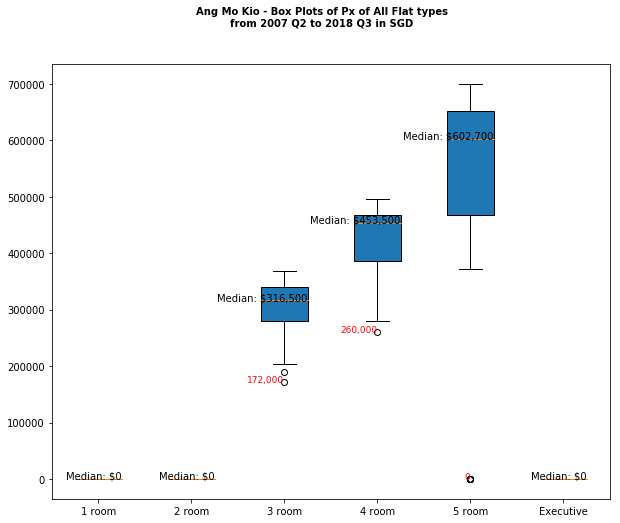

In [362]:
## show box plot of Ang Mo Kio district, all flat types
##### dtype=[('quarter',np.unicode,16),('town',np.unicode,16),
#####                             ('flatType',np.unicode,16),('price',np.float32)], 
#####  npDataFlatTypes = {'1-room': 1, '2-room': 2, '3-room': 3, '4-room': 4, '5-room': 5, 'Executive': 6}
#print(npAngMoKioRm3[0][-1])# print row/col
#print(npAngMoKioRm3['price'][0]) # print col(field) / row
#print(npAngMoKioRm3) # print all

npAngMoKio = npData[npData['town'] == 'Ang Mo Kio']
npAngMoKioRm1 = npAngMoKio[npAngMoKio['flatType']=='1']
npAngMoKioRm2 = npAngMoKio[npAngMoKio['flatType']=='2']
npAngMoKioRm3 = npAngMoKio[npAngMoKio['flatType']=='3']
npAngMoKioRm4 = npAngMoKio[npAngMoKio['flatType']=='4']
npAngMoKioRm5 = npAngMoKio[npAngMoKio['flatType']=='5']
npAngMoKioRm6 = npAngMoKio[npAngMoKio['flatType']=='6']

npAngMoKioRm1_Px = npAngMoKioRm1['price']
npAngMoKioRm2_Px = npAngMoKioRm2['price']
npAngMoKioRm3_Px = npAngMoKioRm3['price']
npAngMoKioRm4_Px = npAngMoKioRm4['price']
npAngMoKioRm5_Px = npAngMoKioRm5['price']
npAngMoKioRm6_Px = npAngMoKioRm6['price']

npAngMoKioRmAll_Px = npAngMoKioRm1_Px.reshape(len(npAngMoKioRm1_Px),1)
npAngMoKioRmAll_Px = np.append(npAngMoKioRmAll_Px,npAngMoKioRm2_Px.reshape(len(npAngMoKioRm2_Px),1),axis=1 )
npAngMoKioRmAll_Px = np.append(npAngMoKioRmAll_Px,npAngMoKioRm3_Px.reshape(len(npAngMoKioRm3_Px),1),axis=1 )
npAngMoKioRmAll_Px = np.append(npAngMoKioRmAll_Px,npAngMoKioRm4_Px.reshape(len(npAngMoKioRm4_Px),1),axis=1 )
npAngMoKioRmAll_Px = np.append(npAngMoKioRmAll_Px,npAngMoKioRm5_Px.reshape(len(npAngMoKioRm5_Px),1),axis=1 )

# Data for Box Plot - All room prices for Ang Mo Kio for All Flat Types from 2007 Q2 to 2018 Q3
# and Labels for X-Axis
#print(npAngMoKioRmAll_Px.shape)
#print(npAngMoKioRmAll_Px)
#print(type((npAngMoKioRmAll_Px)))

npAngMoKioRmAll_Px = np.append(npAngMoKioRmAll_Px,npAngMoKioRm6_Px.reshape(len(npAngMoKioRm6_Px),1),axis=1 )
labels = np.array(['1 room','2 room','3 room','4 room','5 room','Executive'])

# figure related code
fig = plt.figure(figsize=(10,8))
fig.suptitle('Ang Mo Kio - Box Plots of Px of All Flat types\nfrom 2007 Q2 to 2018 Q3 in SGD', fontsize=10, fontweight='bold')

bplot = plt.boxplot(npAngMoKioRmAll_Px,labels=labels, patch_artist=True, vert=True)



for line in bplot['medians']:
    #print(line)
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, 'Median: ${:,.0f}'.format(y),
             horizontalalignment='right',fontsize=10,color='black') # draw above, centered, Median:{:.1f}

fliers = []
for line in bplot['fliers']:
    ndarray = line.get_xydata()
    #print(ndarray)
    if (len(ndarray)>0):
       max_flier = ndarray[:,0].max()
       max_flier_index = ndarray[:,0].argmax()
       x = ndarray[max_flier_index,0] #where to plot the flier text in x position
       y = ndarray[max_flier_index,1] #where to plot the flier text in y position
       #print("Flier: " + str(y) + "," + str(max_flier))      
       plt.text(x,y,'{:,.0f}'.format(int(y)),horizontalalignment='right',fontsize=9,color='red') 

plt.show()

### 3b. Visualisation - Bar Chart

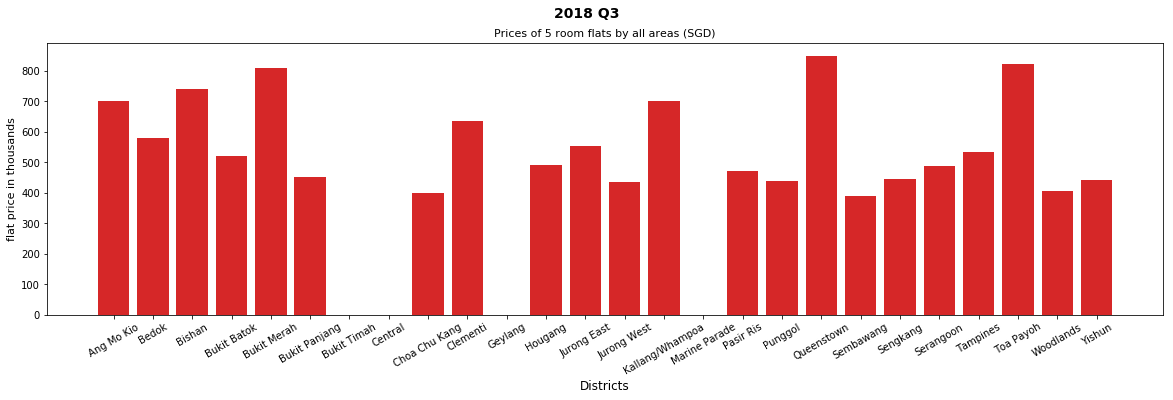

In [251]:
# Data
#npAngMoKioRmAll_Px = np.append(npAngMoKioRmAll_Px,npAngMoKioRm2_Px.reshape(len(npAngMoKioRm2_Px),1),axis=1 )

npData_Rm5 = npData[npData['flatType']== '5']
#print(npData_Rm5)
#print(npData_Rm5['quarter'])
#print(npData_Rm5['town'])
#print(npData_Rm5['flatType'])
#print(npData_Rm5['price'])
npData_Rm5_201803 = npData_Rm5[npData_Rm5['quarter'] == '201803']

# figure related code
fig = plt.figure(figsize=(20,5))
fig.suptitle('2018 Q3', fontsize=14, fontweight='bold')

# plot related code
width = 0.8
barPlot = plt.bar(npData_Rm5_201803['town'], npData_Rm5_201803['price']/1000, width, color='#d62728')

plt.xlabel('Districts',fontsize = 12)
plt.ylabel("flat price in thousands",fontsize = 11)
plt.title('Prices of 5 room flats by all areas (SGD)', fontsize = 11)
plt.xticks(rotation=30)
#plt.xticks(teams, ('Team 1', 'Team 2', 'Team 3'))
#plt.yticks(np.arange(0, 50, 10))


plt.show()



### 3c. Visualisation - Line Chart

In [ ]:
# plt.plot([1, 2, 3, 4],[1, 4, 9, 16]) # OR
# plt.plot([1,2,3,4],[1,4,9,16], 'ro') # 'b-' which is a solid blue line
# for more marker styles
#    https://matplotlib.org/api/markers_api.html
# plt.axis([0, 100, 0, 20]) # [xmin, xmax, ymin, ymax]
# plt.ylabel('some numbers')
# plt.show()



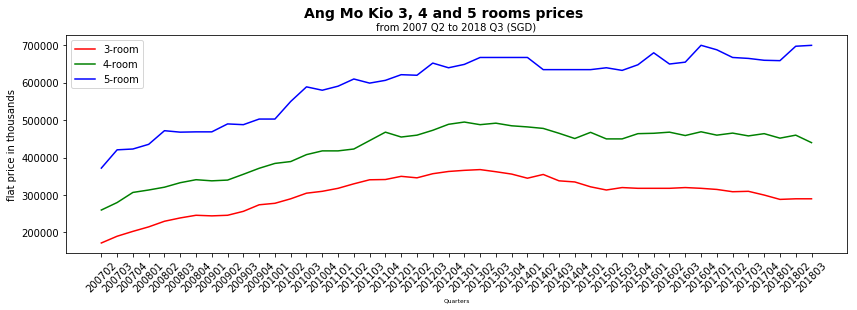

In [316]:
##### dtype=[('quarter',np.unicode,16),('town',np.unicode,16),
#####                             ('flatType',np.unicode,16),('price',np.float32)], 
#####  npDataFlatTypes = {'1-room': 1, '2-room': 2, '3-room': 3, '4-room': 4, '5-room': 5, 'Executive': 6}


# --- DATA
# on visual inspection of csv dataset, Ang Mo Kio does not seem to have 1-room, 2-room nor Executive flat types,
# hence, we do a line plot for 3, 4 and 5 room only
npAngMoKio = npData[npData['town']=='Ang Mo Kio']
npAngMoKioRm3 = npAngMoKio[npAngMoKio['flatType']=='3']
npAngMoKioRm4 = npAngMoKio[npAngMoKio['flatType']=='4']
npAngMoKioRm5 = npAngMoKio[npAngMoKio['flatType']=='5']

# we make the assumption that in the quarters where px == 0, it means that there was no transaction,
# and NOT because the transacted price is zero, hence we transform the price to the last transacted price
# i.e. price holds steady until a new change (whether +ve or -ve occurs)
# otherwise the line plot will have very steep drastic drops and ascents that is not realistic, i.e.
# the price did not actually drop to 0

for idx, item in enumerate(npAngMoKioRm3):
    if item['price'] == 0:
        item['price'] = npAngMoKioRm3['price'][idx-1]        

for idx, item in enumerate(npAngMoKioRm4):
    if item['price'] == 0:
        item['price'] = npAngMoKioRm4['price'][idx-1]        

for idx, item in enumerate(npAngMoKioRm5):
    if item['price'] == 0:
        item['price'] = npAngMoKioRm5['price'][idx-1]        

# --- Figure related code
fig = plt.figure(figsize=(14,4))
fig.suptitle('Ang Mo Kio 3, 4 and 5 rooms prices', fontsize=14, fontweight='bold')

        
plt.plot(npAngMoKioRm3['quarter'],npAngMoKioRm3['price'],'r-',label="3-room")
plt.plot(npAngMoKioRm4['quarter'],npAngMoKioRm4['price'],'g-',label="4-room")
plt.plot(npAngMoKioRm5['quarter'],npAngMoKioRm5['price'],'b-',label="5-room")         

# --- Plot related code
plt.xlabel('Quarters',fontsize = 6)
plt.xticks(rotation=45)
plt.ylabel("flat price in thousands",fontsize = 10)
plt.title('from 2007 Q2 to 2018 Q3 (SGD)', fontsize = 10)

legend = plt.legend()

# --- show
plt.show()


### 3d. Visualisation - Histogram

In [351]:
# Histogram

print('Histogram is not used in this dataset')

Histogram is not used in this dataset


### 3e. Visualisation - Scatter Plot

In [358]:
# Scatter Plot

print('Scatter is not used in this dataset')


Scatter is not used in this dataset
